In [1]:
import os
import random
import numpy as np
import pandas as pd
import patsy
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.anova import AnovaRM
from statsmodels.regression.mixed_linear_model import MixedLMResults
from scipy import stats
import seaborn as sns

In [3]:
public_complaints = pd.read_csv('./Total_Public_Complaints_ASR_PCF_TBL_001.csv', index_col=0)


In [4]:
adf=public_complaints[['Subtype','Count_']]

Serious_complaints = adf[adf['Subtype'] == 'Conduct - Serious']['Count_']
Other_law= adf[adf['Subtype'] == 'Better dealt in Other Law']['Count_']
Service = adf[adf['Subtype'] == 'Service']['Count_']


In [8]:
months = ['August', 'January', 'June']


In [48]:
# Create a dataframe
n=4
df = pd.DataFrame({'Scores': np.r_[Other_law, Serious_complaints],
                  'Time': np.repeat(months, n),
                  'Group': np.repeat(['Control','Mediation'],6)})

In [38]:
df.insert(3, 'Subject', range(0, 0 + len(df)))

In [39]:
df

,Scores,Time,Group,Subject
0,34,August,Control,0
1,33,August,Control,1
2,34,August,Control,2
3,41,August,Control,3
4,6,January,Control,4
5,1,January,Control,5
6,17,January,Mediation,6
7,24,January,Mediation,7
8,23,June,Mediation,8
9,19,June,Mediation,9


ValueError: Invalid RGBA argument: 0.00392156862745098

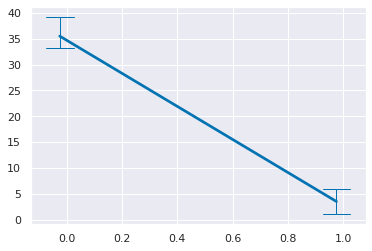

In [40]:
sns.set()
sns.pointplot(data=df, x='Time', y='Scores', hue='Group', dodge=True, markers=['o', 's'],
              capsize=.1, errwidth=1, palette='colorblind')

In [41]:
df.groupby(['Time', 'Group'])['Scores'].agg(['mean', 'std']).round(2)

mean    std
Time    Group                  
August  Control    35.50   3.70
January Control     3.50   3.54
        Mediation  20.50   4.95
June    Mediation  35.25  18.63

In [43]:
#!pip install pingouin
import pingouin as pg
import pandas as pd
import numpy as np
import seaborn as sns

In [44]:
# Compute the two-way mixed-design ANOVA
aov = pg.mixed_anova(dv='Scores', within='Time', between='Group', subject='Subject', data=df)
# Pretty printing of ANOVA summary
pg.print_table(aov)

/opt/conda/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:8525: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
/opt/conda/lib/python3.8/site-packages/numpy/lib/function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/opt/conda/lib/python3.8/site-packages/numpy/lib/function_base.py:2493: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


LinAlgError: Eigenvalues did not converge